<a href="https://colab.research.google.com/github/gkkhnyldz/KNN/blob/main/Ilk4subm%C4%B1sson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
from osgeo import gdal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
datasetTrainingGT=gdal.Open("/content/S2A_MSIL1C_20220516_Train_GT.tif")

# Read the data from the first GeoTIFF file into a NumPy array
trainGT2d = datasetTrainingGT.ReadAsArray()
trainGT2d = np.swapaxes(trainGT2d, 0, 1)
# Convert the 2-dimensional NumPy arrays into 2-dimensional arrays with rows and columns
trainGT1d = trainGT2d.reshape(trainGT2d.shape[0] * trainGT2d.shape[1], 1)
dfTrainLabels = pd.DataFrame(trainGT1d)
dfTrainLabels
# Export the DataFrame as a CSV file
dfTrainLabels.to_csv('train.csv', index=False)
np.save('train_gt.npy', trainGT1d)

datasetTraining = gdal.Open('/content/S2A_MSIL1C_20220516_TrainingData.tif')

# Read the data from the first GeoTIFF file into a NumPy array
dataTraing = datasetTraining.ReadAsArray()
dataTraing = np.swapaxes(dataTraing, 0, 2)
# Convert the 2-dimensional NumPy arrays into 2-dimensional arrays with rows and columns
dataTraining1d = dataTraing.reshape(dataTraing.shape[0] * dataTraing.shape[1], -1)
dfTrain = pd.DataFrame(dataTraining1d)




final_data = pd.concat([dfTrainLabels, dfTrain])

train_label_data = pd.concat([dfTrainLabels, dfTrain], axis=1)
train_label_data.columns=['Code', 'Blue', 'Green', 'Red', 'NIR']
train_label_data.to_csv('train.csv')


np.save('train.npy', dataTraining1d)

datasetTest = gdal.Open('/content/S2B_MSIL1C_20220528_Test.tif')

# Read the data from the first GeoTIFF file into a NumPy array
dataTest2d = datasetTest.ReadAsArray()
dataTest2d = np.swapaxes(dataTest2d, 0, 2)
# Convert the 2-dimensional NumPy arrays into 2-dimensional arrays with rows and columns
dataTest1d = dataTest2d.reshape(dataTest2d.shape[0] * dataTest2d.shape[1], -1)
np.save('test_all.npy', dataTest1d)
# Convert the combined array into a Pandas DataFrame
dfTest = pd.DataFrame(dataTest1d)
dfTest.columns=['Blue', 'Green', 'Red', 'NIR']
# Export the DataFrame as a CSV file
dfTest.to_csv('test.csv')

In [51]:
dftrain=train_label_data
import pandas as pd
import datetime as dt

dftrain["Code"].value_counts()




80    619074
50    143396
30    108276
10     58025
20     15711
60     15014
40      4348
90      1745
0       1416
Name: Code, dtype: int64

In [78]:
dftrain["Code"].unique()

array([10, 80, 50, 30, 90, 60, 40, 20], dtype=uint8)

In [79]:
dftrain["Code"].value_counts()

80    619976
50    143565
30    108395
10     58074
20     15792
60     15043
40      4415
90      1745
Name: Code, dtype: int64

In [80]:
dftrain['Code'].value_counts()

80    619976
50    143565
30    108395
10     58074
20     15792
60     15043
40      4415
90      1745
Name: Code, dtype: int64

In [81]:
dftrain['Code'].value_counts()

80    619976
50    143565
30    108395
10     58074
20     15792
60     15043
40      4415
90      1745
Name: Code, dtype: int64

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression #lineer regresyon modeli import ediyoruz
from sklearn.model_selection import train_test_split #verileri train ve test olarak ayirmak icin kullanacagimiz library
import pandas as pd


# verileri egitim ve test olarak ayirin
X_train, X_test, y_train, y_test = train_test_split(dftrain[["Blue", "Green", "Red",'NIR']], dftrain["Code"], test_size=0.2)

# Egitim verileri uzerinde lineer regresyon modeli olusturun
lr = LinearRegression()
lr.fit(X_train, y_train)

# Egitilmis modeli test verileri uzerinde tahmin yapmak icin kullanin
y_pred = lr.predict(X_test)

# Tahmin edilen verileri gercek verilerle karsilastirarak modelin performansini degerlendirin
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)
# Using Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean squared error (Random Forest): ", mse_rf)





Mean squared error:  90.95362302839152
Mean squared error (Random Forest):  40.457566808831785


In [53]:
x=list(y_pred_rf)
x


[80.0,
 26.7,
 80.0,
 80.0,
 51.4,
 80.0,
 80.0,
 80.0,
 80.0,
 80.0,
 31.8,
 80.0,
 48.7,
 80.0,
 44.9,
 14.8,
 80.0,
 80.0,
 80.0,
 79.2,
 54.1,
 29.8,
 80.0,
 80.0,
 76.7,
 80.0,
 78.4,
 80.0,
 15.4,
 79.1,
 27.9,
 63.6,
 51.6,
 80.0,
 80.0,
 80.0,
 27.2,
 80.0,
 80.0,
 44.1,
 25.3,
 80.0,
 80.0,
 63.1,
 80.0,
 80.0,
 80.0,
 80.0,
 16.4,
 80.0,
 80.0,
 49.7,
 28.8,
 80.0,
 80.0,
 80.0,
 30.0,
 76.8,
 80.0,
 80.0,
 80.0,
 80.0,
 80.0,
 80.0,
 11.2,
 80.0,
 80.0,
 80.0,
 49.9,
 80.0,
 80.0,
 43.9,
 80.0,
 11.4,
 80.0,
 80.0,
 80.0,
 20.4,
 80.0,
 80.0,
 80.0,
 21.3,
 80.0,
 80.0,
 80.0,
 80.0,
 48.5,
 80.0,
 40.4,
 80.0,
 80.0,
 50.0,
 80.0,
 80.0,
 79.2,
 80.0,
 40.0,
 73.1,
 52.8,
 80.0,
 41.8,
 80.0,
 20.4,
 50.4,
 38.2,
 80.0,
 80.0,
 80.0,
 80.0,
 80.0,
 80.0,
 80.0,
 80.0,
 80.0,
 38.8,
 46.0,
 28.2,
 45.8,
 29.6,
 79.7,
 37.6,
 53.3,
 80.0,
 80.0,
 28.9,
 37.3,
 80.0,
 80.0,
 80.0,
 80.0,
 80.0,
 80.0,
 80.0,
 80.0,
 80.0,
 80.0,
 50.0,
 73.6,
 50.7,
 80.0,
 22.8,
 80.0,
 80.0,

In [54]:
y=dftrain["Code"].unique()
y


array([10,  0, 50, 30, 90, 80, 60, 20, 40], dtype=uint8)

In [55]:
from scipy.spatial import distance
import pandas as pd

def euclidean_distance(x, y):
    return distance.euclidean(x, y)

for i in range(len(x)):
    min_distance = float('inf')
    for j in range(len(y)):
        dist = euclidean_distance(x[i], y[j])
        if dist < min_distance:
            min_distance = dist
            closest = j
    x[i] = y[closest]
print(x)

[80, 30, 80, 80, 50, 80, 80, 80, 80, 80, 30, 80, 50, 80, 40, 10, 80, 80, 80, 80, 50, 30, 80, 80, 80, 80, 80, 80, 20, 80, 30, 60, 50, 80, 80, 80, 30, 80, 80, 40, 30, 80, 80, 60, 80, 80, 80, 80, 20, 80, 80, 50, 30, 80, 80, 80, 30, 80, 80, 80, 80, 80, 80, 80, 10, 80, 80, 80, 50, 80, 80, 40, 80, 10, 80, 80, 80, 20, 80, 80, 80, 20, 80, 80, 80, 80, 50, 80, 40, 80, 80, 50, 80, 80, 80, 80, 40, 80, 50, 80, 40, 80, 20, 50, 40, 80, 80, 80, 80, 80, 80, 80, 80, 80, 40, 50, 30, 50, 30, 80, 40, 50, 80, 80, 30, 40, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 50, 80, 50, 80, 20, 80, 80, 50, 50, 80, 80, 80, 80, 80, 80, 50, 10, 80, 50, 80, 50, 80, 80, 30, 80, 10, 50, 80, 80, 80, 30, 80, 80, 20, 80, 20, 80, 10, 80, 80, 80, 80, 50, 80, 80, 20, 20, 80, 80, 80, 80, 30, 80, 80, 10, 80, 80, 40, 50, 80, 50, 50, 10, 80, 80, 50, 80, 80, 50, 80, 80, 50, 80, 80, 60, 80, 80, 80, 30, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 30, 40, 80, 80, 80, 80, 60, 80, 50, 80, 30, 80, 30, 40, 80, 80, 80, 80, 80, 80, 40, 50, 60, 80, 80,

In [56]:
xx=list(x)

In [57]:
a=dftrain[dftrain['Code']==0]
a.index

Int64Index([    22,     51,     52,     82,    111,    112,    113,    142,
               143,    172,
            ...
            966995, 966996, 966997, 966998, 966999, 967000, 967001, 967002,
            967003, 967004],
           dtype='int64', length=1416)

In [58]:
alist=list(a.index)

In [ ]:
alist

In [59]:

for i, val in enumerate(alist):
    dftrain.at[val, 'Code'] = xx[i]

In [60]:
dftrain

,Code,Blue,Green,Red,NIR
0,10,0,0,0,0
1,10,1997,1982,1860,3672
2,10,1950,1906,1776,3335
3,10,1933,1886,1742,3390
4,10,2162,2035,2173,3605
...,...,...,...,...,...
967000,60,2358,2125,1996,1893
967001,40,2375,2085,1948,1897
967002,20,2356,2044,1952,1877
967003,30,2331,2050,1961,1884


In [23]:
dftrain['Code'].value_counts()

80    619982
50    143566
30    108384
10     58069
20     15793
60     15049
40      4417
90      1745
Name: Code, dtype: int64

In [61]:
X_teest=dfTest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
X = dftrain[["Blue", "Green", "Red", "NIR"]]
y = dftrain["Code"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_teest)
y_pred

array([80, 10, 10, ..., 80, 80, 80], dtype=uint8)

In [62]:

predictions = rf_model.predict(X_test)

In [74]:
y_test

<bound method IndexOpsMixin.nunique of 645532    80
10317     10
668716    30
136345    80
241266    80
          ..
342466    80
465630    80
453608    30
110280    80
827325    50
Name: Code, Length: 193401, dtype: uint8>

                        precision    recall  f1-score   support

            Tree cover       0.73      0.65      0.69     11589
             Shrubland       0.61      0.56      0.58      3219
             Grassland       0.70      0.74      0.72     21719
              Cropland       0.47      0.12      0.20       914
              Built-up       0.79      0.88      0.83     28787
Bare/sparse vegetation       0.62      0.26      0.37      2963
Permanent water bodies       0.99      0.99      0.99    123885
            Herbacaous       0.30      0.17      0.22       325

              accuracy                           0.90    193401
             macro avg       0.65      0.55      0.57    193401
          weighted avg       0.90      0.90      0.90    193401



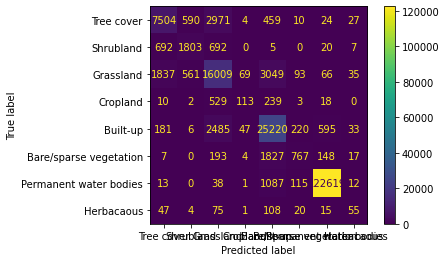

In [83]:

predictions = rf_model.predict(X_test)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Compute the confusion matrix - knn
labels = ['Tree cover', 'Shrubland', 'Grassland', 'Cropland', 'Built-up', 'Bare/sparse vegetation','Permanent water bodies',"Herbacaous"]

cm = confusion_matrix(y_test, predictions)
print(classification_report(y_test, predictions,target_names=labels))
# print(cm)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()

In [98]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predictions)
print("Accuracy:", acc)

Accuracy: 0.9001504645787768


In [87]:
y_test.value_counts()

80    123885
50     28787
30     21719
10     11589
20      3219
60      2963
40       914
90       325
Name: Code, dtype: int64

In [86]:
dftrain["Code"].value_counts()

80    619976
50    143565
30    108395
10     58074
20     15792
60     15043
40      4415
90      1745
Name: Code, dtype: int64

In [27]:

dataframe = pd.DataFrame(y_pred)
dataframe.rename(columns={dataframe.columns[0]: 'Code'}, inplace=True)
dataframe.index.name = 'ID'

,Code
ID,
0,80
1,10
2,10
3,10
4,10
...,...
4620304,80
4620305,80
4620306,80


In [67]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_predLogistic = log_reg.predict(X_test)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                        precision    recall  f1-score   support

            Tree cover       0.63      0.67      0.65     11589
             Shrubland       0.00      0.00      0.00      3219
             Grassland       0.68      0.73      0.71     21719
              Cropland       0.00      0.00      0.00       914
              Built-up       0.75      0.86      0.80     28787
Bare/sparse vegetation       0.00      0.00      0.00      2963
Permanent water bodies       0.98      0.99      0.99    123885
            Herbacaous       0.00      0.00      0.00       325

              accuracy                           0.89    193401
             macro avg       0.38      0.41      0.39    193401
          weighted avg       0.86      0.89      0.87    193401



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


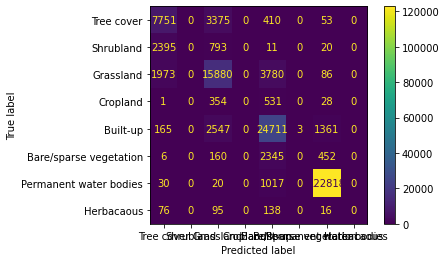

In [90]:
cm = confusion_matrix(y_test,y_predLogistic )
print(classification_report(y_test, y_predLogistic,target_names=labels))
# print(cm)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()

In [97]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_predLogistic)
print("Accuracy:", acc)

Accuracy: 0.8850005946194693


In [ ]:
dataframe = pd.DataFrame(y_predLogistic)
dataframe.rename(columns={dataframe.columns[0]: 'Code'}, inplace=True)
dataframe.index.name = 'ID'
dataframe.to_csv('Gökhan-GökçeLogistic).csv')
dataframe

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_predKNN = knn.predict(X_test)


                        precision    recall  f1-score   support

            Tree cover       0.60      0.59      0.60     11589
             Shrubland       0.48      0.48      0.48      3219
             Grassland       0.63      0.64      0.63     21719
              Cropland       0.18      0.18      0.18       914
              Built-up       0.77      0.76      0.76     28787
Bare/sparse vegetation       0.29      0.31      0.30      2963
Permanent water bodies       0.99      0.99      0.99    123885
            Herbacaous       0.14      0.17      0.16       325

              accuracy                           0.87    193401
             macro avg       0.51      0.51      0.51    193401
          weighted avg       0.87      0.87      0.87    193401



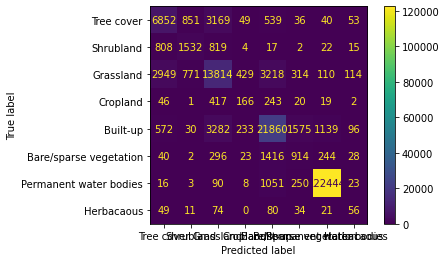

In [95]:
cm = confusion_matrix(y_test,y_predKNN )
print(classification_report(y_test, y_predKNN,target_names=labels))
# print(cm)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()

In [99]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_predKNN)
print("Accuracy:", acc)

Accuracy: 0.8667897270438105


In [ ]:
dataframe = pd.DataFrame(y_predKNN)
dataframe.rename(columns={dataframe.columns[0]: 'Code'}, inplace=True)
dataframe.index.name = 'ID'
dataframe.to_csv('Gökhan-GökçeKNN).csv')
dataframe

In [101]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [103]:
rf_model = RandomForestClassifier(n_estimators=100, multiclass='ovr')
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
auc_knn = auc(fpr_knn, tpr_knn)

fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_proba_log_reg)
auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# ROC eğrilerini görselleştir
plt.figure()
lw = 2
plt.plot(fpr_knn, tpr_knn, color='darkorange',
         lw=lw, label='KNN (AUC = %0.2f)' % auc_knn)
plt.plot(fpr_log_reg, tpr_log_reg, color='green',
         lw=lw, label='Logistic Regression (AUC = %0.2f)' % auc_log_reg)
plt.plot(fpr_rf, tpr_rf, color='red',
         lw=lw, label='Random Forest (AUC = %0.2f)' % auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

TypeError: ignored

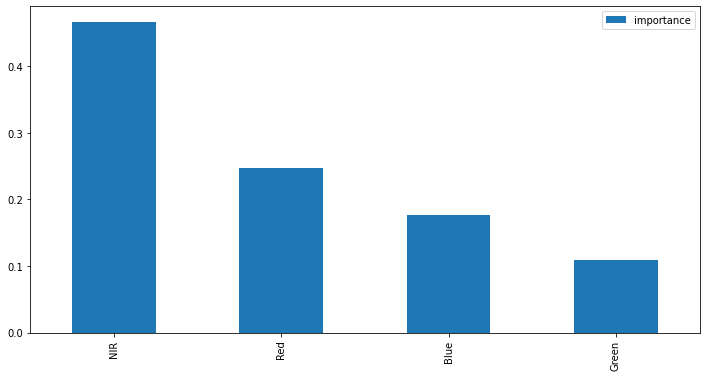

In [104]:
from sklearn.ensemble import RandomForestClassifier

# Feature importance matrix
importances = rf_model.feature_importances_

# Feature isimleri
feature_names = X_train.columns

# Önemli feature'ları görselleştir
importance_df = pd.DataFrame(importances, index=feature_names, columns=['importance'])
importance_df.sort_values(by='importance', ascending=False, inplace=True)

importance_df.plot(kind='bar', figsize=(12,6))
plt.show()

[0. 0. 0. 0.]


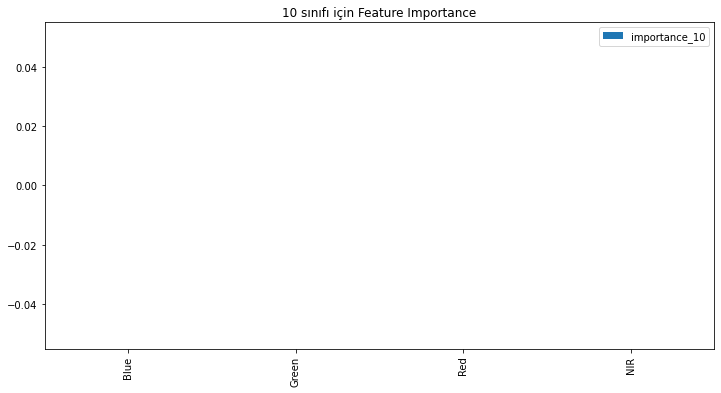

[0. 0. 0. 0.]


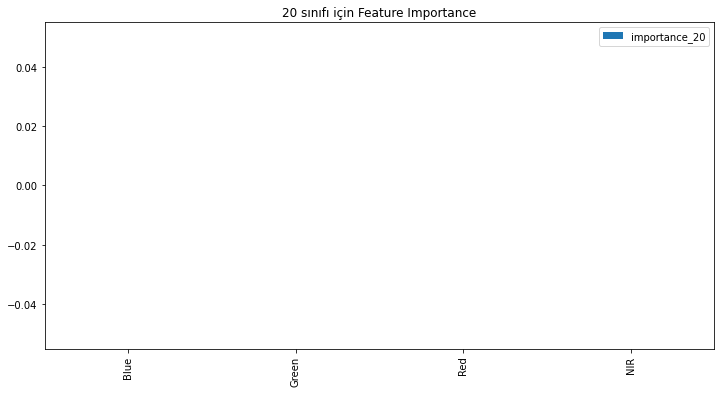

[0. 0. 0. 0.]


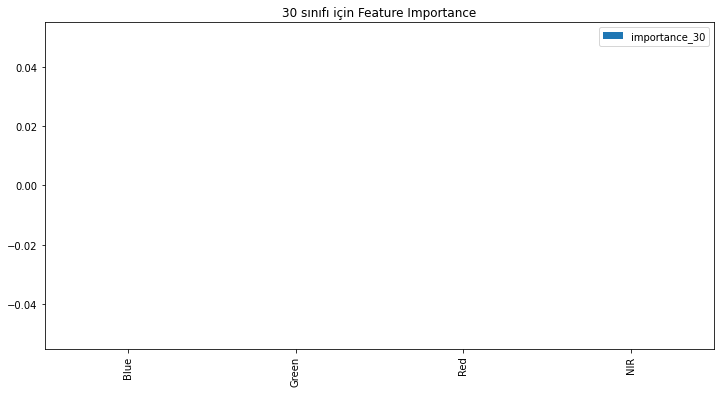

[0. 0. 0. 0.]


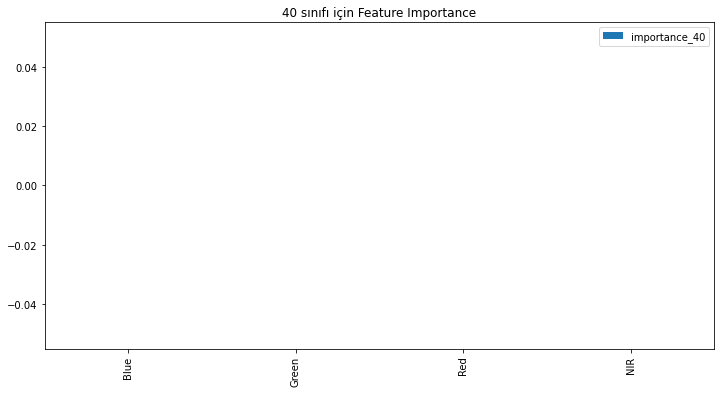

[0. 0. 0. 0.]


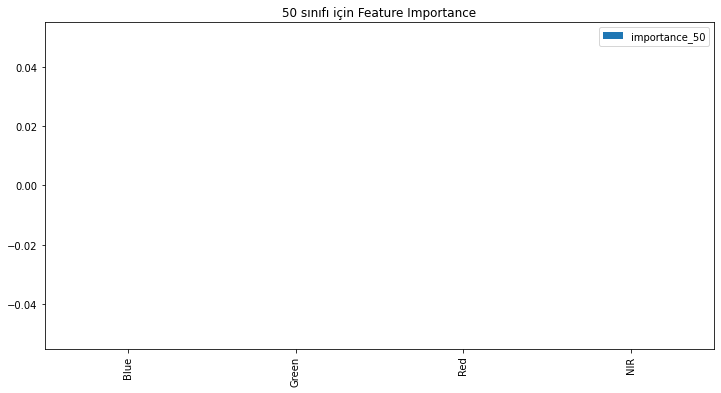

[0. 0. 0. 0.]


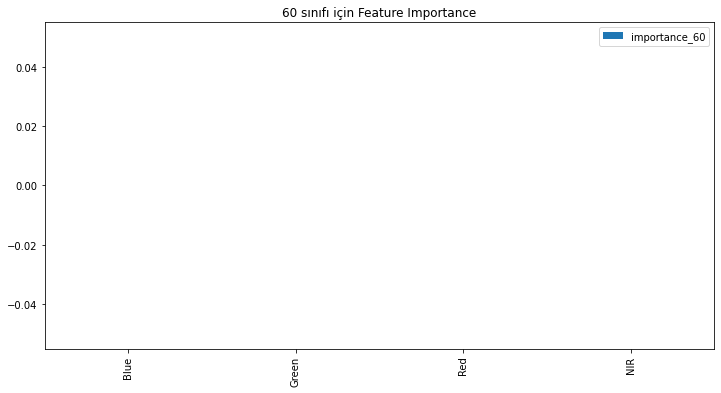

[0. 0. 0. 0.]


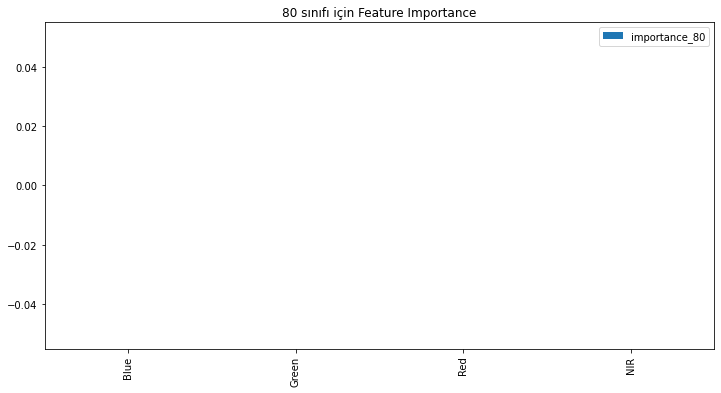

[0. 0. 0. 0.]


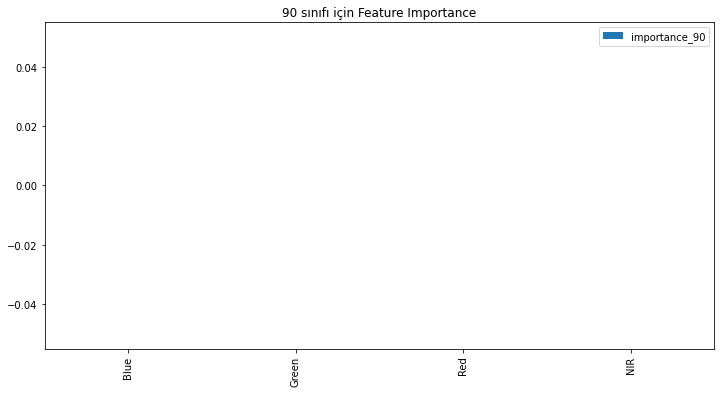

In [135]:
from sklearn.ensemble import RandomForestClassifier

# Sınıflar
classes = np.unique(dftrain["Code"])

# Her sınıf için feature importance değerleri
for c in classes:
    # Eğitim verileri o sınıf için seç
    X_train_c = X_train[y_train == c]
    y_train_c = y_train[y_train == c]
    # Random Forest Classifier oluşturun

    rf_model.fit(X_train_c, y_train_c)
    
    # Feature importance matrix
    importances = rf_model.feature_importances_
    print(importances)

    # Feature isimleri
    feature_names = X_train.columns
    # Önemli feature'ları görselleştir
    importance_df = pd.DataFrame(importances, index=feature_names, columns=[f'importance_{c}'])
    importance_df.sort_values(by=f'importance_{c}', ascending=False, inplace=True)

    importance_df.plot(kind='bar', figsize=(12,6))
    plt.title(f"{c} sınıfı için Feature Importance")
    plt.show()

Sütunların isimleri classes listesinde yer alan sınıflarla aynı değil.


<ipython-input-134-094f0977423a>:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if classes != table.columns[:-2].tolist():


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_new, y_train)
X_test_new = selector.transform(X_teest)
y_predKNN = knn.predict(X_test_new)
dataframe = pd.DataFrame(y_predKNN)
dataframe.rename(columns={dataframe.columns[0]: 'Code'}, inplace=True)
dataframe.index.name = 'ID'
dataframe.to_csv('Gökhan-GökçeKNNwıth3feature).csv')

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred